In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'innis_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2662

## Calculate mean value of each satellite track 

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2394


In [4]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

2.2956316471099854 2001-06-07 23:09:31.392270
1.596500039100647 2001-06-09 08:38:19.955730
2.0216875076293945 2001-06-12 12:49:17.567382
1.4731765985488892 2001-06-15 00:30:18.204560
1.7403159141540527 2001-06-17 21:08:02.712993
2.1622633934021 2001-06-19 09:52:21.235197
1.7687143087387085 2001-06-26 09:51:13.159599
2.7671053409576416 2001-06-27 19:06:34.472862
1.8625789880752563 2001-06-29 07:50:52.636102
2.0920324325561523 2001-07-01 06:03:39.768704
1.036428689956665 2001-07-07 17:05:04.417410
0.6060999631881714 2001-07-09 05:49:23.663086
1.648750066757202 2001-07-13 11:04:06.361328
1.5386250019073486 2001-07-17 12:49:06.668457
1.385263204574585 2001-07-19 03:47:54.918174
1.2006111145019531 2001-07-20 00:30:06.583225
1.940210461616516 2001-07-27 13:02:09.025494
1.5348948240280151 2001-07-29 01:46:26.908563
1.1720000505447388 2001-07-30 12:16:57.112305
1.2116206884384155 2001-08-05 05:35:18.843160
0.8623334169387817 2001-08-06 11:00:41.119792
0.7191579341888428 2001-08-07 23:44:58.328

0.2802143096923828 2011-03-24 02:52:50.800437
1.1123499870300293 2011-03-27 12:17:38.284374
1.6573809669131323 2011-03-29 01:01:56.642112
3.431450271606445 2011-04-06 10:16:10.131641
3.3426190330868675 2011-04-07 23:00:28.368303
0.5880000591278076 2011-04-16 08:14:41.552735
1.5305999755859374 2011-04-19 13:13:48.859532
0.2953529638402602 2011-04-22 01:27:54.775282
2.5495335896809896 2011-04-26 06:13:15.261458
2.4538825539981617 2011-04-27 13:05:53.616728
1.738196849822998 2011-05-01 12:26:51.592715
1.3193001747131348 2011-05-06 04:11:43.843750
1.5746666590372722 2011-05-09 02:28:23.014810
2.285166634453668 2011-05-16 06:15:11.122070
2.5438889397515188 2011-05-17 14:54:34.442708
2.526722378200955 2011-05-19 00:05:24.666300
2.2221177045036766 2011-05-21 00:02:58.175384
1.3208000183105468 2011-05-26 00:08:45.805068
0.914150047302246 2011-05-27 12:53:03.820312
0.503388934665256 2011-06-04 22:07:17.981251
0.6165499687194824 2011-06-06 10:51:36.660938
1.242850112915039 2011-06-14 20:05:49.93

0.9342500686645508 2017-08-22 14:31:15.990626
0.669952392578125 2017-08-24 03:15:34.102772
0.6121176481246948 2017-08-25 12:20:16
1.0530000925064087 2017-08-27 02:29:06.693356
1.0222223069932723 2017-08-29 06:19:39.284288
2.00323553646312 2017-08-31 06:17:08.579964
1.7235000610351563 2017-09-01 12:29:46.853126
1.396291732788086 2017-09-04 10:46:25.558798
0.5303529851576861 2017-09-05 17:55:05.574449
1.374000072479248 2017-09-08 23:55:38.218750
1.5720624923706057 2017-09-11 10:28:20.358399
1.1910001039505005 2017-09-12 23:59:58.999995
1.1344375610351562 2017-09-13 00:00:07.500000
1.0925200653076172 2017-09-14 15:27:25.998751
0.8630668004353841 2017-09-21 08:26:52.915104
0.8421000480651856 2017-09-22 21:11:08.709375
0.4811667336357964 2017-09-27 04:54:29.659071
0.6236000537872315 2017-10-01 06:25:22.600781
0.7872353161082548 2017-10-02 16:32:29.196692
1.2191000938415528 2017-10-04 16:29:58.132812
1.13955557346344 2017-10-10 11:21:17.666667
1.187550067901611 2017-10-11 04:23:54.537305
1.2

## Make list for each month

In [5]:
# This is for wave heights
jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sep = []
octo = []
nov = []
dec = []

for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        jan.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 2:
        feb.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 3:
        mar.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 4:
        apr.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 5:
        may.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 6:
        jun.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 7:
        jul.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 8:
        aug.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 9:
        sep.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 10:
        octo.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 11:
        nov.append(np.mean(wh[days[k]:days[k+1]]))
    if dt.month == 12:
        dec.append(np.mean(wh[days[k]:days[k+1]]))

In [64]:
wh

array([2.17700005, 0.29100001, 2.16400003, ..., 2.25294452, 1.22335005,
       1.17020006])

In [62]:
for k in range(len(days)):
    print jan[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

 0.7686000466346741 1985-03-31 08:13:46.832721
0.6541999578475952 1985-04-05 21:26:15.503909
1.8524285554885864 1985-04-08 21:35:06.187500
1.9820001125335691 1985-04-23 09:53:29.146876
1.6690001487731934 1985-05-16 11:33:14.298438
0.8360589146614075 1985-07-30 16:49:35.815105
1.6799334287643433 1985-08-22 18:29:05.607639
1.6904211044311523 1985-09-14 20:08:44.546877
1.235579013824463 1985-09-23 09:29:54.689844
1.052210569381714 1985-10-07 21:48:02.343750
0.986099898815155 1985-10-30 23:27:24.464844
0.6158888936042786 1985-11-02 23:36:09.269886
0.7856842279434204 1985-11-08 12:48:30.101562
1.7403684854507446 1985-11-26 01:15:21.096897
1.3499001264572144 1986-01-11 04:33:36.420703
1.6460527181625366 1986-01-19 17:54:59.206250
1.8405556678771973 1986-02-03 06:12:35.508371
0.7690526843070984 1986-03-01 08:00:17.441840
1.776699781417847 1986-03-24 09:39:13.101562
1.9347897768020632 1986-04-16 11:18:06.899671
1.2725000381469729 1986-05-09 12:56:55.488838
0.6924445033073425 1986-06-01 14:35:3

IndexError: list index out of range

In [63]:
jan

[0.7686000466346741,
 0.6541999578475952,
 1.8524285554885864,
 1.9820001125335691,
 1.6690001487731934,
 0.8360589146614075,
 1.6799334287643433,
 1.6904211044311523,
 1.235579013824463,
 1.052210569381714,
 0.986099898815155,
 0.6158888936042786,
 0.7856842279434204,
 1.7403684854507446,
 1.3499001264572144,
 1.6460527181625366,
 1.8405556678771973,
 0.7690526843070984,
 1.776699781417847,
 1.9347897768020632,
 1.2725000381469729,
 0.6924445033073425,
 0.9080000519752502,
 0.8856501579284668,
 0.6810587644577026,
 0.7994546294212341,
 2.1283175945281982,
 1.0412105321884155,
 0.7984706163406372,
 2.0901050567626958,
 2.4398424625396733,
 1.571050047874451,
 1.6551111936569214,
 1.9902633428573608,
 1.8942352533340452,
 0.8330000042915344,
 3.551200151443481,
 1.8054444789886477,
 1.4682632684707642,
 2.29547381401062,
 3.821631908416748,
 4.095423221588135,
 0.8156452178955078,
 2.080833196640014,
 0.9699999690055848,
 1.2901667356491089,
 2.2067368030548096,
 2.0143887996673584,
 2.

In [58]:
len(jan)+len(feb)+len(mar)+len(apr)+len(may)+len(jun)+len(jul)+len(aug)+len(sep)+len(octo)+len(nov)+len(dec)

2585

In [6]:
#wind speed
janws = []
febws = []
marws = []
aprws = []
mayws = []
junws = []
julws = []
augws = []
sepws = []
octws = []
novws = []
decws = []

for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        janws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 2:
        febws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 3:
        marws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 4:
        aprws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 5:
        mayws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 6:
        junws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 7:
        julws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 8:
        augws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 9:
        sepws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 10:
        octws.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 11:
        nov.append(np.mean(ws[days[k]:days[k+1]]))
    if dt.month == 12:
        decws.append(np.mean(ws[days[k]:days[k+1]]))

In [8]:
print len(jan)
jan

199


[0.7686000466346741,
 0.6541999578475952,
 1.8524285554885864,
 1.9820001125335691,
 1.6690001487731934,
 0.8360589146614075,
 1.6799334287643433,
 1.6904211044311523,
 1.235579013824463,
 1.052210569381714,
 0.986099898815155,
 0.6158888936042786,
 0.7856842279434204,
 1.7403684854507446,
 1.3499001264572144,
 1.6460527181625366,
 1.8405556678771973,
 0.7690526843070984,
 1.776699781417847,
 1.9347897768020632,
 1.2725000381469729,
 0.6924445033073425,
 0.9080000519752502,
 0.8856501579284668,
 0.6810587644577026,
 0.7994546294212341,
 2.1283175945281982,
 1.0412105321884155,
 0.7984706163406372,
 2.0901050567626958,
 2.4398424625396733,
 1.571050047874451,
 1.6551111936569214,
 1.9902633428573608,
 1.8942352533340452,
 0.8330000042915344,
 3.551200151443481,
 1.8054444789886477,
 1.4682632684707642,
 2.29547381401062,
 3.821631908416748,
 4.095423221588135,
 0.8156452178955078,
 2.080833196640014,
 0.9699999690055848,
 1.2901667356491089,
 2.2067368030548096,
 2.0143887996673584,
 2.

In [9]:
np.mean(jan)
np.mean(jun)

1.70892771006522

In [10]:
overall = [
np.mean(jan),
np.mean(feb),
np.mean(mar),
np.mean(apr),
np.mean(may),
np.mean(jun),
np.mean(jul),
np.mean(aug),
np.mean(sep),
np.mean(octo),
np.mean(nov),
np.mean(dec)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(jan),
np.std(feb),
np.std(mar),
np.std(apr),
np.std(may),
np.std(jun),
np.std(jul),
np.std(aug),
np.std(sep),
np.std(octo),
np.std(nov),
np.std(dec)]

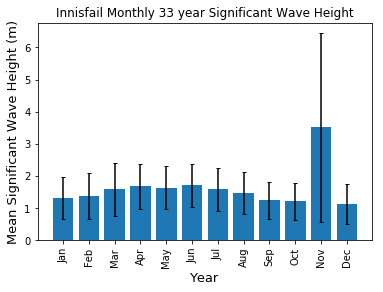

In [11]:
index = np.arange(len(label))
plt.bar(index, overall, yerr=stdev, align='center', capsize=2)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail Monthly 33 year Significant Wave Height')
plt.savefig('Innisfail Monthly 33 year Significant Wave Height')
plt.show()

In [12]:
print np.mean(nov)
print np.mean(dec)
print np.mean(jun)

3.511680197103592
1.1188301175616984
1.70892771006522


## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [13]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [14]:
T = waveperiod(wh[days],ws[days])
print T
print len(T)

[7.21842117 3.84835449 6.06049484 ... 5.92469211 6.59358157 5.14627429]
2394


In [15]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.74

1.2006111145019531 2001-07-20 00:30:06.583225
1.940210461616516 2001-07-27 13:02:09.025494
1.5348948240280151 2001-07-29 01:46:26.908563
1.1720000505447388 2001-07-30 12:16:57.112305
1.2116206884384155 2001-08-05 05:35:18.843160
0.8623334169387817 2001-08-06 11:00:41.119792
0.7191579341888428 2001-08-07 23:44:58.328125
2.123473882675171 2001-08-16 08:59:11.631168
0.9443333745002748 2001-08-17 21:43:29.512151
0.4628235697746277 2001-08-21 12:48:49.599265
1.2175883054733276 2001-08-24 00:29:50.524903
0.974526345729828 2001-08-26 06:57:42.893093
1.3075001239776611 2001-08-27 19:42:00.658594
0.8165000081062317 2001-09-02 14:42:34.207033
0.8357895016670227 2001-09-05 04:56:13.479852
1.3576843738555908 2001-09-06 17:40:31.221216
0.7569032311439514 2001-09-09 06:03:08.685539
0.6153124570846558 2001-09-15 02:54:42.224244
1.3721667528152466 2001-09-16 15:39:01.021701
1.602000117301941 2001-09-19 15:55:26.263023
2.106842279434204 2001-09-25 00:53:14.893786
1.2127000093460083 2001-09-26 13:37:33.

0.7110000610351562 2009-08-30 22:27:27.943751
0.6811000347137451 2009-09-08 07:41:41.306250
0.5767895046033358 2009-09-09 20:26:00.015624
0.6222857832908629 2009-09-11 00:00:42.279008
1.8000499725341796 2009-09-18 05:40:13.162695
1.0672000885009765 2009-09-19 18:24:31.421875
0.6675333380699158 2009-09-26 23:57:46.989583
0.7756666541099548 2009-09-27 12:22:27.858074
0.7866500377655029 2009-09-28 03:38:45.241992
1.1680000305175782 2009-09-29 16:23:03.398438
0.7012500286102294 2009-10-08 01:37:17.049560
1.6484502792358398 2009-10-09 14:21:35.164062
0.35600003600120544 2009-10-16 00:00:39.245897
1.1668500900268557 2009-10-17 23:35:48.747656
2.528150177001953 2009-10-19 12:20:06.616406
1.4357620420910062 2009-10-27 21:34:20.455358
1.8895715985979356 2009-10-29 19:53:35.944196
2.0458667278289795 2009-10-31 23:57:47.234375
2.266181945800781 2009-11-01 12:22:28.659091
1.4624500274658203 2009-11-06 19:32:52.186719
1.977750015258789 2009-11-08 08:17:09.572657
0.7478261201278024 2009-11-16 22:06:

0.7397499680519104 2016-12-17 00:00:05.500000
0.8274999965320934 2016-12-20 00:10:01.717329
0.9181176914888268 2016-12-23 06:36:10.701057
1.1156111823187933 2016-12-25 06:33:43.056858
1.0775555504692926 2016-12-27 15:06:37.467882
1.0559999181869182 2017-01-03 04:55:27.174826
1.5219286509922572 2017-01-08 01:49:29.576382
0.5925000309944153 2017-01-12 23:59:58.499998
0.527400016784668 2017-01-13 00:00:07
0.5237619309198289 2017-01-16 11:03:39.919642
0.31754545731977984 2017-01-17 22:12:12.492058
0.5154000282287597 2017-01-21 05:11:04.960938
1.0731000900268557 2017-01-26 09:02:12.032812
1.0229000091552731 2017-01-27 21:46:30.175000
1.7340478442964098 2017-02-05 07:00:43.517113
1.6511001586914062 2017-02-06 19:45:01.876564
1.8840000629425049 2017-02-08 23:59:58.499998
1.908533334732056 2017-02-09 00:00:07
1.3975882810704852 2017-02-13 23:26:41.998915
0.960800075531006 2017-02-15 04:59:15.084375
0.9566000938415528 2017-02-16 17:43:33.406249
0.5627058744430542 2017-02-17 12:20:13
0.993538489

In [45]:
np.mean(T)

5.220216270455039

In [17]:
janTp= []
febTp= []
marTp= []
aprTp= []
mayTp= []
junTp= []
julTp= []
augTp= []
sepTp= []
octTp = []
novTp= []
decTp= []

for k in range(len(days)-1):
    dt = netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')
    
    if dt.month == 1:
        janTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 2:
        febTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 3:
        marTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 4:
        aprTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 5:
        mayTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 6:
        junTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 7:
        julTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 8:
        augTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 9:
        sepTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 10:
        octTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 11:
        novTp.append(np.mean(T[days[k]:days[k+1]]))
    if dt.month == 12:
        decTp.append(np.mean(T[days[k]:days[k+1]]))

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [57]:
print len(T), len(wh)

2394 2662


In [50]:
janTp

[6.38851939740019,
 4.579485667535076,
 5.008655814237941,
 5.511557083114969,
 5.4976606394607455,
 4.774740775874781,
 5.403592849353592,
 5.40949216120966,
 4.968159479542644,
 4.738438981152333,
 4.637474785312307,
 5.929135001101125,
 4.344936717448032,
 5.676825204860028,
 4.716659575012917,
 5.350219155959077,
 5.094591703047518,
 4.519115761021994,
 5.287786166617,
 5.3049631513321565,
 4.853713924649839,
 6.033251125989573,
 4.364037903942469,
 5.917868325001423,
 5.102068155802488,
 4.964676985754652,
 5.250382021376908,
 4.958424003190048,
 5.488271445496742,
 5.848786617126806,
 5.589310598592817,
 6.3226138414189,
 5.558569769358091,
 5.717918712492249,
 6.421222971044403,
 6.194513748341318,
 5.187669352136041,
 5.1947483222306445,
 5.305133426406469,
 5.122621018629562,
 5.089866661339058,
 6.618412756265078,
 4.452418510678148,
 4.989251679961942,
 4.665334287301198,
 5.653550345906508,
 5.589394591556954,
 6.281636997552328,
 6.036018448111321,
 6.637887100216412,
 4.6

In [49]:
print len(jan),len(janTp)
jan, janTp
print np.mean(jan), np.mean(janTp)

199 199
1.313808979496272 nan


In [28]:
for k in range(len(days)):
    print wh[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

 2.1770000457763667 1985-03-31 08:13:46.832721
0.29100000858306885 1985-04-05 21:26:15.503909
2.1640000343322754 1985-04-08 21:35:06.187500
1.579800009727478 1985-04-23 09:53:29.146876
2.3106002807617188 1985-05-16 11:33:14.298438
0.4826667308807373 1985-07-30 16:49:35.815105
1.2717777490615845 1985-08-22 18:29:05.607639
0.4731818437576294 1985-09-14 20:08:44.546877
0.4109000265598297 1985-09-23 09:29:54.689844
2.001000165939331 1985-10-07 21:48:02.343750
1.241000056266785 1985-10-30 23:27:24.464844
1.731545329093933 1985-11-02 23:36:09.269886
1.1175554990768433 1985-11-08 12:48:30.101562
0.5516666769981384 1985-11-26 01:15:21.096897
0.7686000466346741 1986-01-11 04:33:36.420703
0.6541999578475952 1986-01-19 17:54:59.206250
1.075285792350769 1986-02-03 06:12:35.508371
1.744444489479065 1986-03-01 08:00:17.441840
2.001062393188477 1986-03-24 09:39:13.101562
2.3270528316497803 1986-04-16 11:18:06.899671
0.5181428790092468 1986-05-09 12:56:55.488838
2.768230676651001 1986-06-01 14:35:32.7

1.385263204574585 2001-07-19 03:47:54.918174
1.2006111145019531 2001-07-20 00:30:06.583225
1.940210461616516 2001-07-27 13:02:09.025494
1.5348948240280151 2001-07-29 01:46:26.908563
1.1720000505447388 2001-07-30 12:16:57.112305
1.2116206884384155 2001-08-05 05:35:18.843160
0.8623334169387817 2001-08-06 11:00:41.119792
0.7191579341888428 2001-08-07 23:44:58.328125
2.123473882675171 2001-08-16 08:59:11.631168
0.9443333745002748 2001-08-17 21:43:29.512151
0.4628235697746277 2001-08-21 12:48:49.599265
1.2175883054733276 2001-08-24 00:29:50.524903
0.974526345729828 2001-08-26 06:57:42.893093
1.3075001239776611 2001-08-27 19:42:00.658594
0.8165000081062317 2001-09-02 14:42:34.207033
0.8357895016670227 2001-09-05 04:56:13.479852
1.3576843738555908 2001-09-06 17:40:31.221216
0.7569032311439514 2001-09-09 06:03:08.685539
0.6153124570846558 2001-09-15 02:54:42.224244
1.3721667528152466 2001-09-16 15:39:01.021701
1.602000117301941 2001-09-19 15:55:26.263023
2.106842279434204 2001-09-25 00:53:14.8

2.392300033569336 2010-07-22 14:54:29.321094
2.775533437728882 2010-07-23 00:00:36.840601
2.8873003005981444 2010-07-24 03:38:47.274024
1.373650074005127 2010-08-01 12:53:01.192188
1.9640501022338868 2010-08-03 01:37:19.415088
1.7813334465026855 2010-08-07 23:57:45.172917
1.4117273092269895 2010-08-08 12:22:26.598723
1.2371111975775824 2010-08-10 14:05:44.256077
1.5949000358581542 2010-08-11 10:51:33.520702
1.2773999214172362 2010-08-12 23:35:51.723437
0.5541176515467027 2010-08-16 01:43:46.920324
0.9888999938964844 2010-08-21 08:50:05.276562
1.447599983215332 2010-08-22 21:34:23.641405
0.8202000260353088 2010-08-24 12:19:35.728124
2.0455999374389653 2010-08-27 00:00:37.347100
2.592550086975097 2010-08-31 06:48:36.958398
1.2662858508882069 2010-09-01 19:32:55.348214
0.9842353147618912 2010-09-06 12:43:16.696232
1.1860000610351562 2010-09-10 04:47:08.563672
0.8967333436012268 2010-09-11 23:57:43.880210
1.0470000505447388 2010-09-12 12:22:25.306107
1.1681818528608845 2010-09-14 00:18:44.

In [37]:
stats.describe(mar)

DescribeResult(nobs=209, minmax=(0.17333332697550455, 5.654118061065674), mean=1.5831748608049085, variance=0.6734653120886225, skewness=0.902928088839792, kurtosis=1.8758130858771898)

In [30]:
for k in range(len(days)):
    print marTp[days[k]], netCDF4.num2date(tt[days[k]],u'days since 1985-01-01 00:00:00 UTC')

 7.218421169518095 1985-03-31 08:13:46.832721
5.883475846840707 1985-04-05 21:26:15.503909
5.461074435456013 1985-04-08 21:35:06.187500
4.834617551835316 1985-04-23 09:53:29.146876
5.011228420419205 1985-05-16 11:33:14.298438
4.931238086690478 1985-07-30 16:49:35.815105
5.042949336445704 1985-08-22 18:29:05.607639
4.835737629624447 1985-09-14 20:08:44.546877
5.512816463857596 1985-09-23 09:29:54.689844
5.717800125235836 1985-10-07 21:48:02.343750
5.433935175195665 1985-10-30 23:27:24.464844
5.5599318756193 1985-11-02 23:36:09.269886
5.180895080253213 1985-11-08 12:48:30.101562
5.946642869118215 1985-11-26 01:15:21.096897
6.101731898506559 1986-01-11 04:33:36.420703
5.58026441990167 1986-01-19 17:54:59.206250
5.535153978372911 1986-02-03 06:12:35.508371
5.301008766322547 1986-03-01 08:00:17.441840
5.058050955635481 1986-03-24 09:39:13.101562
4.983760895834836 1986-04-16 11:18:06.899671
5.518246370688639 1986-05-09 12:56:55.488838
5.135902620163153 1986-06-01 14:35:32.742789
4.8033218743

IndexError: list index out of range

In [24]:
marTp

[7.218421169518095,
 5.883475846840707,
 5.461074435456013,
 4.834617551835316,
 5.011228420419205,
 4.931238086690478,
 5.042949336445704,
 4.835737629624447,
 5.512816463857596,
 5.717800125235836,
 5.433935175195665,
 5.5599318756193,
 5.180895080253213,
 5.946642869118215,
 6.101731898506559,
 5.58026441990167,
 5.535153978372911,
 5.301008766322547,
 5.058050955635481,
 4.983760895834836,
 5.518246370688639,
 5.135902620163153,
 4.803321874306129,
 4.948587475855916,
 6.225240287471258,
 5.674067551329118,
 5.079555697626195,
 4.641325869511346,
 5.11221582348211,
 5.833711871474723,
 5.2114063338595695,
 5.540407574265752,
 5.320210224908051,
 5.832970332185756,
 5.822603398141309,
 5.722450321544228,
 5.8192983949509305,
 5.835701191658137,
 4.710453941492172,
 5.127583659785453,
 5.49999976340851,
 4.595205508898173,
 5.697373583000244,
 5.375461545744572,
 4.404043649329617,
 4.56931565355828,
 5.502539078302062,
 5.022237541253376,
 5.3261268129782655,
 4.913250404934448,
 4.

In [20]:
print 'Month    Min             Max             Mean'
print 'Jan', min(janTp), max(janTp), np.mean(janTp())#.mean(), stats.sem(janTp)
print 'Feb', min(febTp), max(febTp)#,# febTp.mean(), stats.sem(febTp)
print 'Mar', min(marTp), max(marTp)#,# marTp.mean(), stats.sem(marTp)
print 'Apr', min(aprTp), max(aprTp)#,# aprTp.mean(), stats.sem(aprTp)
print 'May', min(mayTp), max(mayTp)#,# mayTp.mean(), stats.sem(mayTp)
print 'Jun', min(junTp), max(junTp)#,# junTp.mean(), stats.sem(junTp)
print 'Jul', min(julTp), max(julTp)#,# julTp.mean(), stats.sem(julTp)
print 'Aug', min(augTp), max(augTp)#,# augTp.mean(), stats.sem(augTp)
print 'Sep', min(sepTp), max(sepTp)#,# sepTp.mean(), stats.sem(sepTp)
print 'Oct', min(octTp), max(octTp)#,# octTp.mean(), stats.sem(octTp)
print 'Nov', min(novTp), max(novTp)#,# novTp.mean(), stats.sem(novTp)
print 'Dec', min(decTp), max(decTp)#,# decTp.mean(), stats.sem(decTp)

Month    Min             Max             Mean
Jan 3.5903476233382916 6.637887100216412

TypeError: 'list' object is not callable

In [21]:
overall = [
np.mean(janTp),
np.mean(febTp),
np.mean(marTp),
np.mean(aprTp),
np.mean(mayTp),
np.mean(junTp),
np.mean(julTp),
np.mean(augTp),
np.mean(sepTp),
np.mean(octTp),
np.mean(novTp),
np.mean(decTp)]


label = [
'Jan',
'Feb',
'Mar',
'Apr',
'May',
'Jun',
'Jul',
'Aug',
'Sep',
'Oct',
'Nov',
'Dec']

stdev = [
np.std(janTp),
np.std(febTp),
np.std(marTp),
np.std(aprTp),
np.std(mayTp),
np.std(junTp),
np.std(julTp),
np.std(augTp),
np.std(sepTp),
np.std(octTp),
np.std(novTp),
np.std(decTp)]

In [22]:
janTp.mean

AttributeError: 'list' object has no attribute 'mean'

## Plot data

In [ ]:
index = np.arange(len(label))
plt.bar(index, overall)
plt.xticks(index,label, fontsize=10, rotation=90)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Significant Wave Height (m)', fontsize=13, rotation=90)
plt.title('Innisfail 33 year Significant Wave Height')
plt.show()

In [ ]:
# Get some parameters for the Stereographic Projection
lon_0 = lon1.mean()
lat_0 = lat1.mean()


# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)


In [ ]:
lon = x
lat =y

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree(central_longitude=140))
ax.scatter(lon,lat)
ax.coastlines()
ax.stock_img()
ax.gridlines()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=to_lon,
                                                          central_latitude=to_lat))
# Here we add the transform argument and use the Geodetic projection.
ax.scatter(lon, lat, transform=ccrs.Geodetic())
ax.stock_img()
ax.coastlines()
ax.gridlines()

In [ ]:
# An arbitrary choice.
GBReast = 147
GBRwest = 148
GBRnorth = -17
GBRsouth = -18

standard_parallels = (49, 77)
central_longitude = -(91 + 52 / 60)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([GBRwest, GBReast, GBRsouth, GBRnorth])
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.OCEAN)

In [ ]:
# Get some parameters for the Stereographic Projection
lons =lon[days]
lats = lat[days]

lon_0 = lons.mean()
lat_0 = lats.mean()

In [ ]:



# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)


In [ ]:
#lat
lat1 =ncjt1.variables['LATITUDE'][:]
latj2 =ncjtwo2.variables['LATITUDE'][:]
latc2 =ncc2.variables['LATITUDE'][:]
latsa2 = ncs2.variables['LATITUDE'][:]
latse2 = ncse2.variables['LATITUDE'][:]

#long
lon1 = ncjt1.variables['LONGITUDE'][:]
lonj2 =ncjtwo2.variables['LONGITUDE'][:]
lonc2 =ncc2.variables['LONGITUDE'][:]
lons2 =ncs2.variables['LONGITUDE'][:]
lonse2= ncse2.variables['LONGITUDE'][:]

# Get some parameters for the Stereographic Projection
lon_0 = lon.mean()
lat_0 = lat.mean()


# Plot Data

fig = plt.figure(figsize=(20, 20))
m = Basemap(width=1000000,height=800000,
            resolution='h',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m.etopo(scale=3, alpha=0.5)


# Add Grid Lines
m.drawmeridians(np.arange(-180., 181., 1.), labels=[0,0,0,1], fontsize=10) 
m.drawparallels(np.arange(-90., 91., 1.),labels=[1,0,0,0], fontsize=10)
m.drawcoastlines()
m.drawcountries()

#coordinates
x1, y1 = m(lon1, lat1)
xj2, yj2 = m(lonj2,latj2)
xc2, yc2 =m(lonc2,latc2)
xs2,ys2=m(lons2,latsa2)
xse2,yse2 = m(lonse2,latse2)



#Plot
#m.scatter(x1,y1,marker="*",alpha=0.7)
#m.scatter(xj2,yj2,marker=".", alpha=0.7)
#m.scatter(xc2,yc2,marker=".", alpha=0.7)
m.scatter(xs2,ys2,marker=".", alpha=0.7)
#m.scatter(xse2,yse2,marker=".", alpha=0.7)
